In [1]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
with open('data/community.txt', 'r') as f:
    community = f.read()
all_snippets = community
all_snippets

'I ate here Monday night for a working dinner with a coworker. I immediately saw its reason for name, beyond the owner\'s fandom of the show of the same name: the tablet setup are nearly all communal long tables. There\'re rather few non-shared tables which is fine as not only is NYC filled with such setup but there\'s a liveliness in the Columbia area vibe which prefers this setup. There\'s a shortage of such nice sit-down restaurants in the Columbia area so this place is not only capitalizing on its presence but doing so with great style and flare.\n\nI ordered the beef burger which was very juicy, perfectly lean, well sauced, cooked as desired (medium-well, for those who wonder), and paired with a dill pickle, a handmade cole slaw that lacked mayo (which is good as mayo\'s pure trans-fat), and a spindle of fries. My coworker got the salmon sandwich, same review applies.\n\nAwesome bar alongside, but we didn\'t patronize it. Vast amounts of seating and an open kitchen where tons of f

In [10]:
text = ' '
for snippet in all_snippets:
    text+=snippet[0]
text

' I ate here Monday night for a working dinner with a coworker. I immediately saw its reason for name, beyond the owner\'s fandom of the show of the same name: the tablet setup are nearly all communal long tables. There\'re rather few non-shared tables which is fine as not only is NYC filled with such setup but there\'s a liveliness in the Columbia area vibe which prefers this setup. There\'s a shortage of such nice sit-down restaurants in the Columbia area so this place is not only capitalizing on its presence but doing so with great style and flare.\n\nI ordered the beef burger which was very juicy, perfectly lean, well sauced, cooked as desired (medium-well, for those who wonder), and paired with a dill pickle, a handmade cole slaw that lacked mayo (which is good as mayo\'s pure trans-fat), and a spindle of fries. My coworker got the salmon sandwich, same review applies.\n\nAwesome bar alongside, but we didn\'t patronize it. Vast amounts of seating and an open kitchen where tons of 

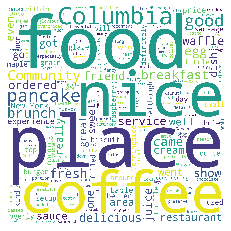

In [11]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=3000,height=3000).generate(text)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [2]:
# Using PlainTextCorpusReader to read the directories. It reads all matching giles in a directory and saves them by file-ids

from nltk.corpus import PlaintextCorpusReader
community_root = "data/community"
le_monde_root = "data/le_monde"
community_files = "community.*"
le_monde_files = "le_monde.*"
heights_root = "data/heights"
heights_files = "heights.*"
amigos_root = "data/amigos"
amigos_files = "amigos.*"
community_data = PlaintextCorpusReader(community_root,community_files)
le_monde_data = PlaintextCorpusReader(le_monde_root,le_monde_files)
heights_data = PlaintextCorpusReader(heights_root,heights_files)
amigos_data = PlaintextCorpusReader(amigos_root,amigos_files)

In [5]:
# Simple Analysis: Complexity
# Comparison details of local resturants. 
# Counting the number of sentences and words in the data
text = le_monde_data.raw()
import nltk
from nltk import sent_tokenize, word_tokenize
sentences = nltk.Text(sent_tokenize(text))
print(len(sentences))
words = nltk.Text(word_tokenize(text))
print(len(words))

188
2595


In [6]:
# counting the number of characters and getting the average length of a word

num_chars = len(text)
num_words = len(word_tokenize(text))
num_sents = len(sent_tokenize(text))
vocab = {x.lower() for x in word_tokenize(text)}
print(num_chars, int(num_chars/num_words), int(num_words/num_sents), (len(vocab)/num_words))

12332 4 13 0.29132947976878615


In [9]:
def get_complexity(text):
    num_chars = len(text)
    num_words = len(word_tokenize(text))
    num_sents = len(sent_tokenize(text))
    vocab = {x.lower() for x in word_tokenize(text)}
    return len(vocab), int(num_chars/num_words), int(num_words/num_sents), len(vocab)/num_words

In [10]:
get_complexity(le_monde_data.raw())

(756, 4, 13, 0.29132947976878615)

In [12]:
restaurant_data = [('community',community_data.raw()),('le monde',le_monde_data.raw())
                  ,('heights',heights_data.raw()), ('amigos',amigos_data.raw())]

In [13]:
for text in restaurant_data:
    (vocab,word_size,sent_size,vocab_to_text) = get_complexity(text[1])
    print("{0:15s}\t{1:1.2f}\t{2:1.2f}\t{3:1.2f}\t{4:1.2f}".format(text[0],vocab,word_size,sent_size,vocab_to_text))

community      	1029.00	4.00	16.00	0.28
le monde       	756.00	4.00	13.00	0.29
heights        	720.00	4.00	16.00	0.28
amigos         	792.00	4.00	15.00	0.24


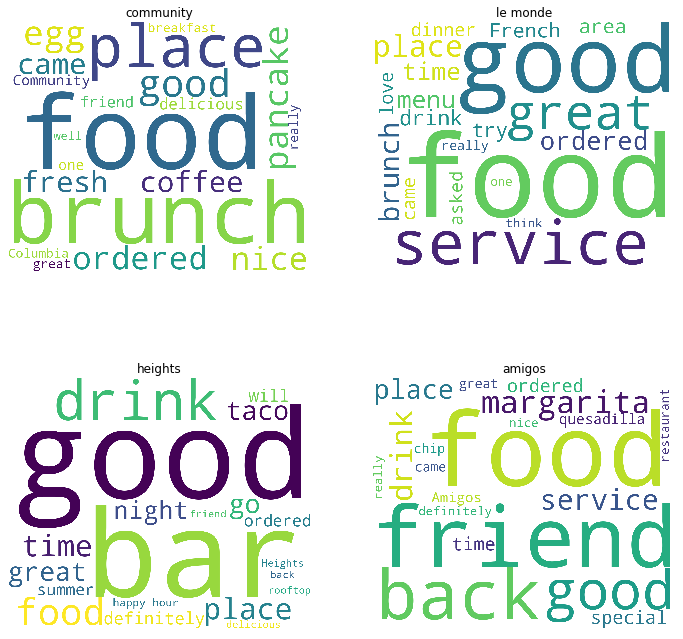

In [14]:
texts = restaurant_data
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
#Remove unwanted words
#As we look at the cloud, we can get rid of words that don't make sense by adding them to this variable
DELETE_WORDS = []
def remove_words(text_string,DELETE_WORDS=DELETE_WORDS):
    for word in DELETE_WORDS:
        text_string = text_string.replace(word,' ')
    return text_string

#Remove short words
MIN_LENGTH = 0
def remove_short_words(text_string,min_length = MIN_LENGTH):
    word_list = text_string.split()
    for word in word_list:
        if len(word) < min_length:
            text_string = text_string.replace(' '+word+' ',' ',1)
    return text_string


#Set up side by side clouds
COL_NUM = 2
ROW_NUM = 2
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))

for i in range(0,len(texts)):
    text_string = remove_words(texts[i][1])
    text_string = remove_short_words(text_string)
    ax = axes[i%2]
    ax = axes[i//2, i%2] #Use this if ROW_NUM >=2
    ax.set_title(texts[i][0])
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=1200,height=1000,max_words=20).generate(text_string)
    ax.imshow(wordcloud)
    ax.axis('off')
plt.show()

In [15]:
# importing corpora

from nltk.book import *


*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908
